In [1]:
#Decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from warnings import simplefilter
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.shape

(1025, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


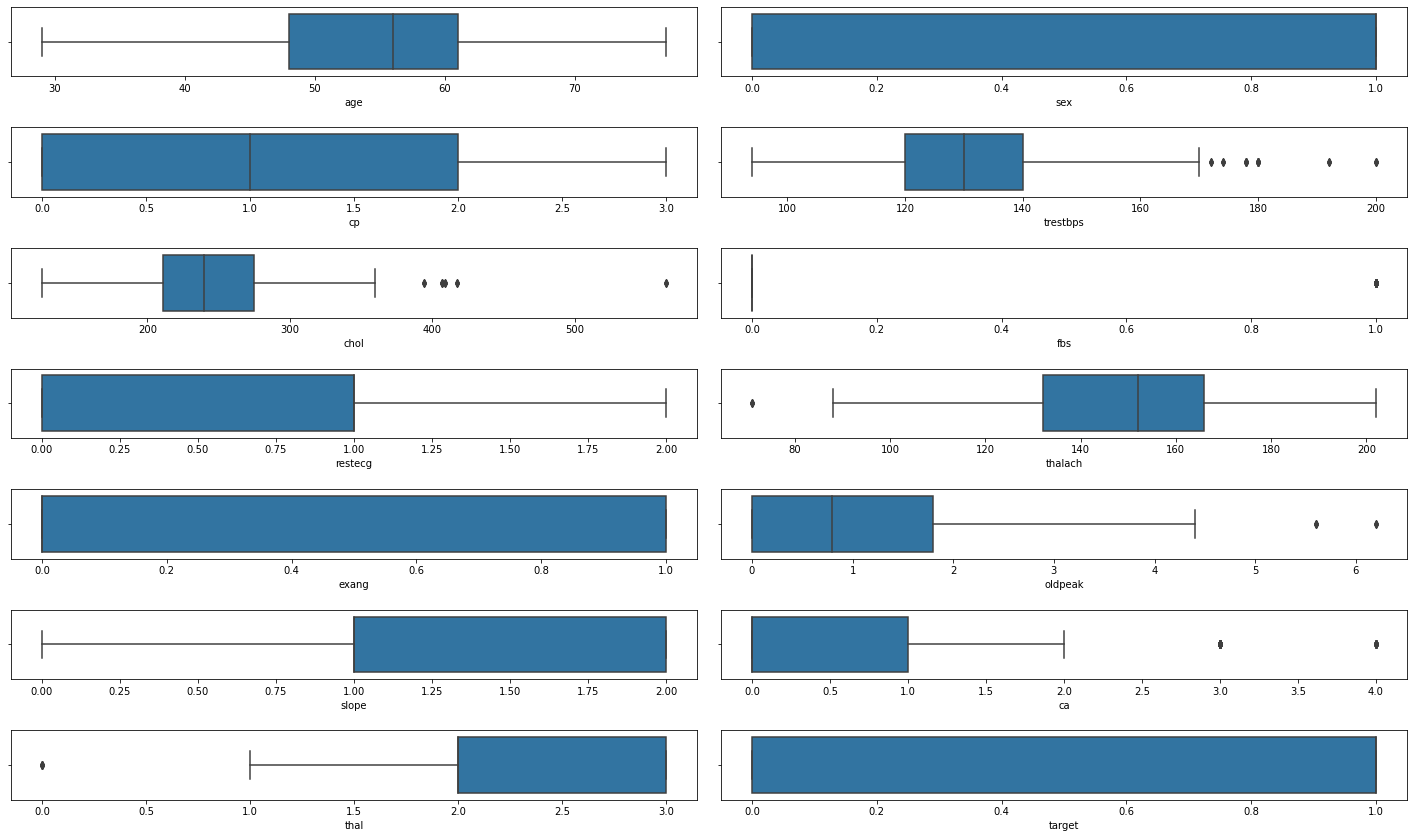

In [8]:
fig,ax = plt.subplots(nrows = 7,ncols = 2,figsize = (20,12))
for variable,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(df[variable],ax= subplot)
    plt.tight_layout(pad=2,h_pad=2)
plt.show()

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<Figure size 2160x1440 with 0 Axes>

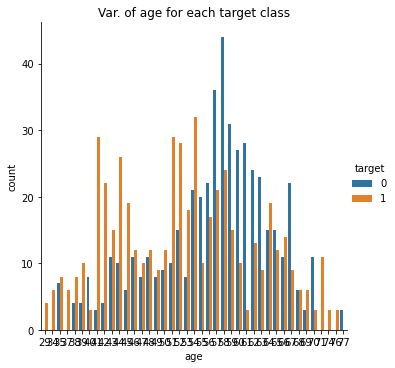

In [11]:
plt.figure(figsize=(30,20))
sns.catplot(kind='count',data = df,x = 'age',hue='target',order=df['age'].sort_values().unique())
plt.title('Var. of age for each target class')
plt.show()

<Figure size 1440x2160 with 0 Axes>

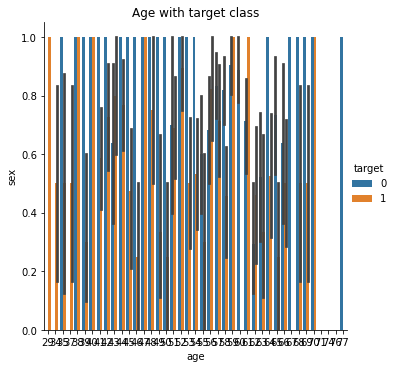

In [12]:
plt.figure(figsize=(20,30))
sns.catplot(kind='bar',data = df,x = 'age',y = 'sex',hue='target')
plt.title('Age with target class')
plt.show()

In [13]:
df_features = df.drop(['target'],axis=1)
df_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [14]:
#train_test_split
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(df_features,df['target'],train_size=0.8,random_state=11)

In [16]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
566,50,0,0,110,254,0,0,159,0,0.0,2,0,2
134,54,1,1,108,309,0,1,156,0,0.0,2,0,3
712,45,0,1,112,160,0,1,138,0,0.0,1,0,2
545,48,1,1,110,229,0,1,168,0,1.0,0,0,3
183,42,1,2,130,180,0,1,150,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,68,1,0,144,193,1,1,141,0,3.4,1,2,3
850,58,1,1,120,284,0,0,160,0,1.8,1,0,2
583,43,1,0,120,177,0,0,120,1,2.5,1,0,3
673,54,1,2,120,258,0,0,147,0,0.4,1,0,3


In [17]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
894,51,1,0,140,299,0,1,173,1,1.6,2,0,3
989,71,0,1,160,302,0,1,162,0,0.4,2,2,2
819,58,0,0,170,225,1,0,146,1,2.8,1,2,1
513,54,1,0,110,206,0,0,108,1,0.0,1,1,2
763,58,0,3,150,283,1,0,162,0,1.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,59,1,3,178,270,0,0,145,0,4.2,0,0,3
681,59,1,0,170,326,0,0,140,1,3.4,0,0,3
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3
707,56,0,1,140,294,0,0,153,0,1.3,1,0,2


In [18]:
y_train

566    1
134    1
712    1
545    0
183    1
      ..
792    0
850    0
583    0
673    1
332    1
Name: target, Length: 820, dtype: int64

In [19]:
y_test

894    0
989    1
819    0
513    0
763    1
      ..
528    1
681    0
833    0
707    1
467    0
Name: target, Length: 205, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
Xtrain=ss.fit_transform(x_train)
X_test = ss.transform(x_test)

In [23]:
from sklearn .tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier(random_state=10)
clf.fit(Xtrain,y_train)
y_train_pred=clf.predict(Xtrain)
y_test_pred = clf.predict(X_test)

In [26]:
from sklearn import tree

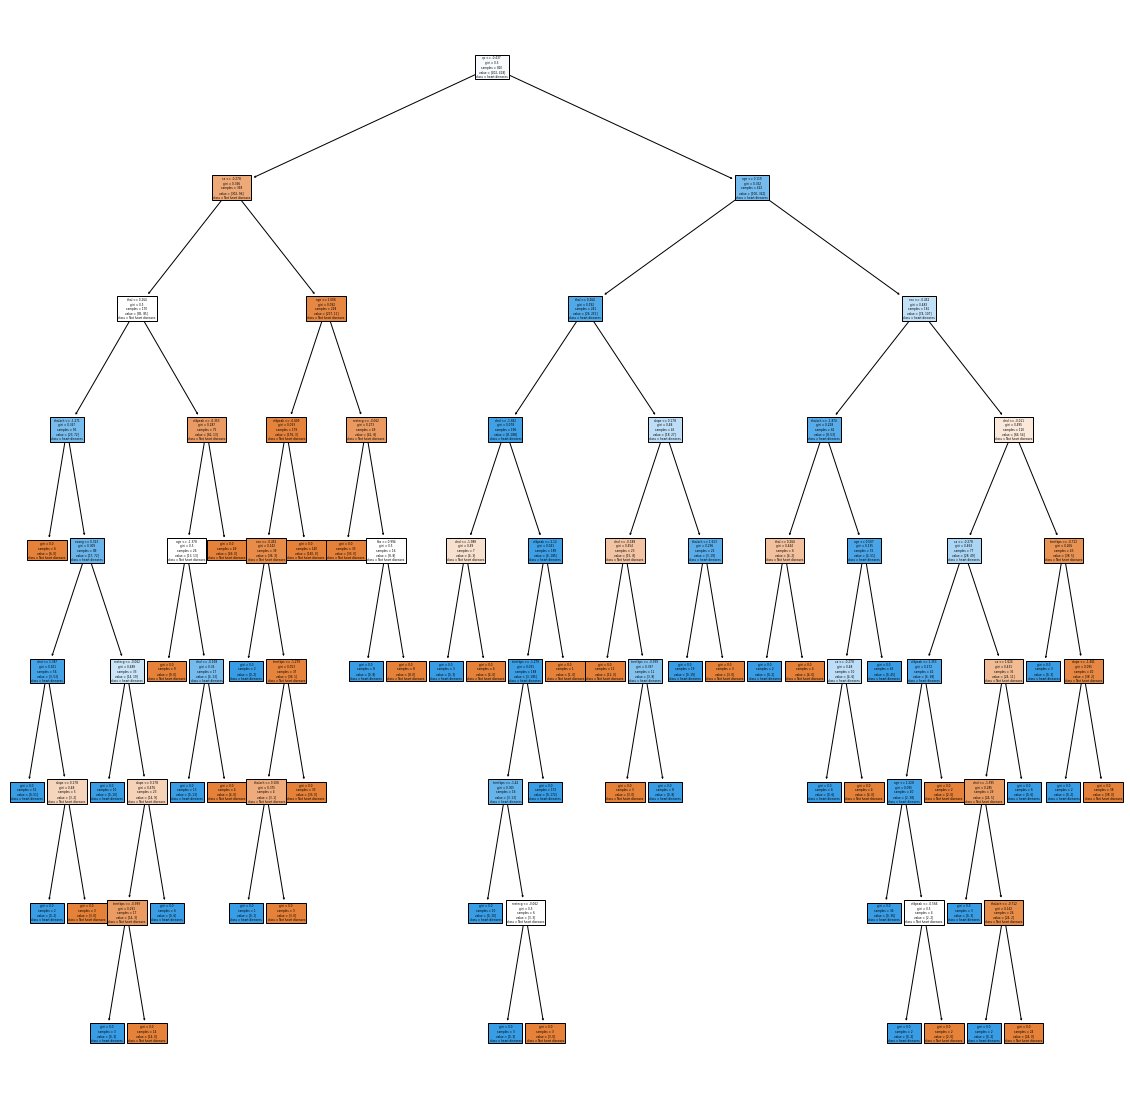

In [29]:
plt.figure(figsize=(20,20))
features = df.columns
classes=['Not heart diseases','heart diseases']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [31]:
def plot_confusion_matrix(y_train_pred,ytrain,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,ytrain)
    sns.heatmap(cf,annot=True,yticklabels= classes,xticklabels= classes,cmap=Blues,fmt='g')
    plt.tight_layout()
    plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

clf = DecisionTreeClassifier(random_state=10)
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(Xtrain, y_train)

best_estimator = gcv.best_estimator_
print("Best parameters:", gcv.best_params_)
print("Best estimator:", best_estimator)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator: DecisionTreeClassifier(max_depth=10, random_state=10)


In [42]:
model_gcv = gcv.best_estimator_
model_gcv.fit(Xtrain, y_train)
y_train_pred = model_gcv.predict(Xtrain)
y_test_pred = model_gcv.predict(X_test)

In [46]:
path = clf.cost_complexity_pruning_path(Xtrain, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00118655 0.00231707 0.0023874  0.00241067 0.00292683
 0.00325203 0.00399826 0.00418118 0.0041928  0.00450281 0.00452328
 0.00463415 0.00465462 0.00498498 0.00532151 0.0055897  0.00602582
 0.00611348 0.00614294 0.00631929 0.00681709 0.00695833 0.00735033
 0.00746055 0.0083047  0.00839311 0.00897261 0.01035772 0.01151598
 0.01623482 0.01775396 0.02283522 0.03493111 0.04847542 0.13603515]


In [51]:
path = clf.cost_complexity_pruning_path(Xtrain, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(Xtrain, y_train)
    ccfs.append(clf)

In [52]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf.fit(Xtrain,y_train)
y_train_pred=clf.predict(Xtrain)
y_test_pred = clf.predict(X_test)